In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc as candlesticks
import matplotlib.dates as mpl_dates
from copy import copy
import talib
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas_ta as ta
plt.style.use('ggplot')
file_path = r'C:\file.csv'
df = pd.read_csv(file_path)
print(df.head())

             Date Time      Open      High       Low     Close  Volume  \
0  2023-09-18 00:01:00  15382.25  15389.00  15379.50  15383.25     504   
1  2023-09-18 00:02:00  15384.00  15393.00  15383.50  15390.50     391   
2  2023-09-18 00:03:00  15391.00  15399.75  15391.00  15397.00     370   
3  2023-09-18 00:04:00  15396.25  15398.75  15396.25  15397.75      78   
4  2023-09-18 00:05:00  15397.00  15400.00  15396.75  15399.50     115   

   Trade Position  Trade Outcome  
0             NaN            NaN  
1             NaN            NaN  
2             NaN            NaN  
3             NaN            NaN  
4             NaN            NaN  


In [16]:
sma = talib.SMA(df.Close,5)
candlesticks(df)
plt.plot(sma,'k')

TypeError: candlestick_ohlc() missing 1 required positional argument: 'quotes'

In [17]:
day = df.Close.resample('1D').ohlc()
candlesticks(day, w=1440)
plt.plot(day.close)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

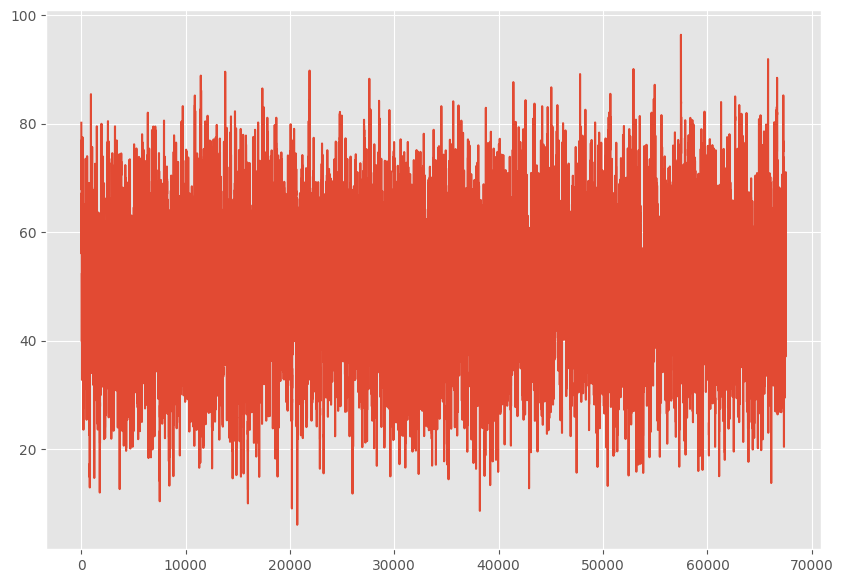

In [19]:
plt.figure(figsize=[10,7])
rsi = talib.RSI(df.Close,14)
plt.plot(rsi)

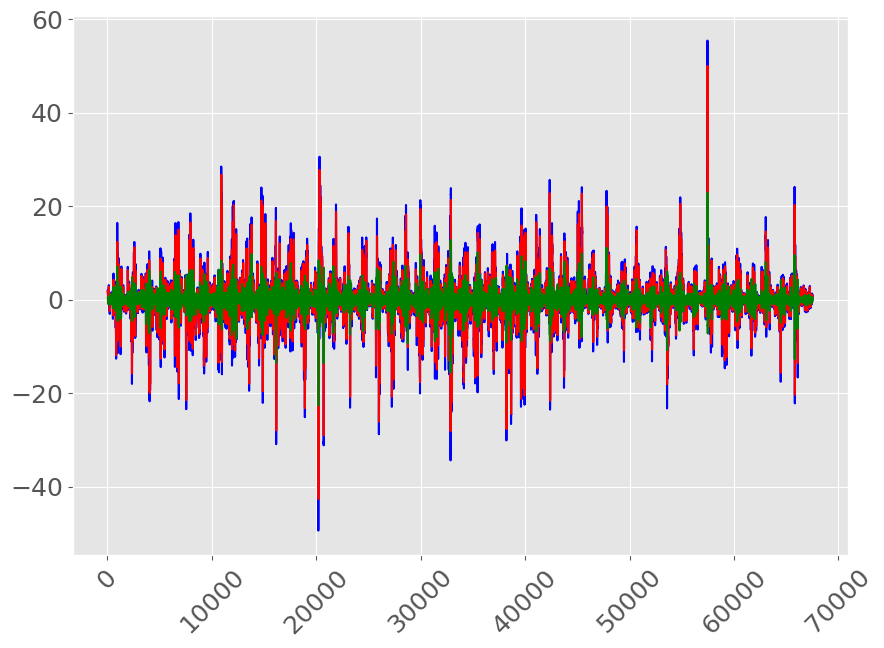

In [21]:
macd,sig,hist = talib.MACD(df.Close,12,26,9)
plt.figure(figsize=[10,7])
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.plot(macd,'b-',sig,'r-',hist,'g-');

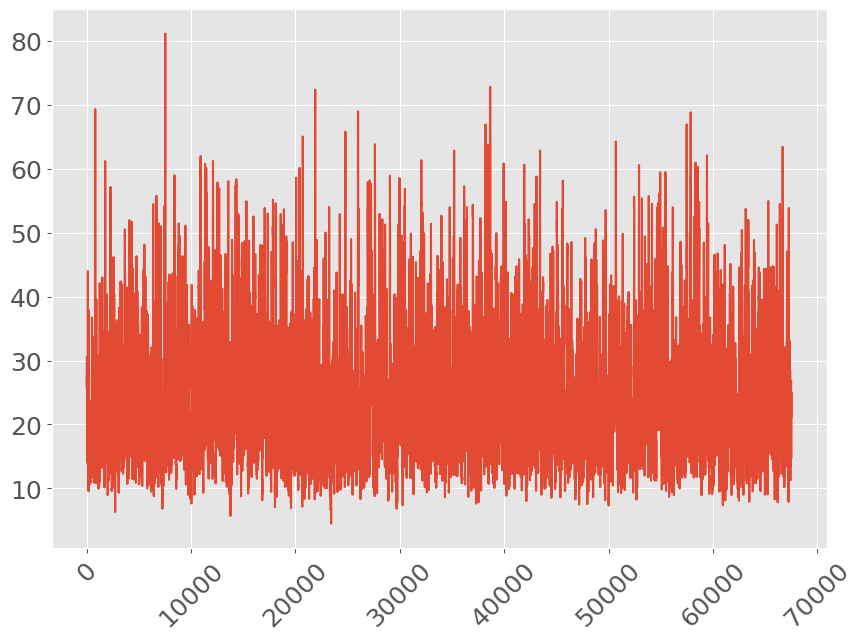

In [22]:
adx = talib.ADX(df.High,df.Low,df.Close,14)
plt.figure(figsize=[10,7])
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.plot(adx);

In [23]:
pattern = talib.CDL2CROWS(df.Open,df.High,df.Low,df.Close)

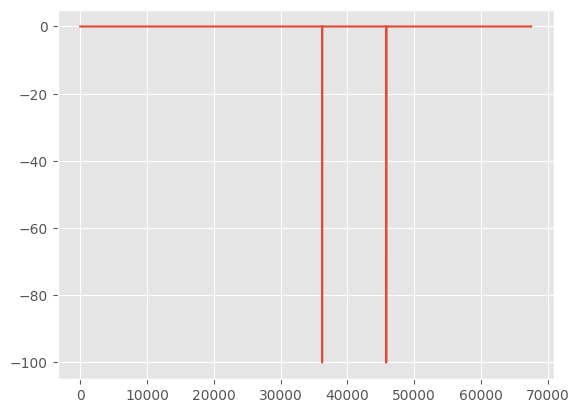

In [24]:
plt.plot(pattern)

In [26]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
        res=getattr(talib,attr)(df.Open,df.High,df.Low,df.Close)
        results.append(res)
        cols.append(attr)

In [27]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67511,0,0,0,0,0,0,0,0,0,0,...,-100,0,0,0,0,0,0,0,0,0
67512,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0
67513,0,0,0,0,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

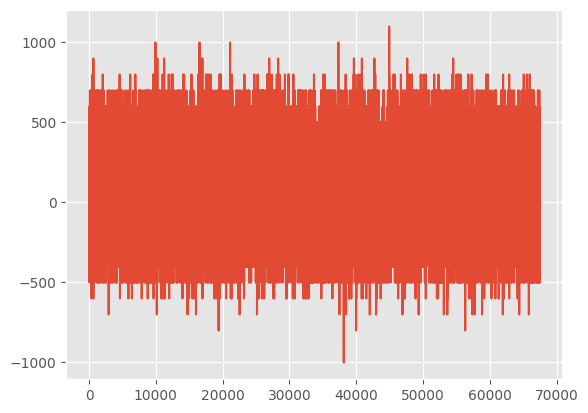

In [28]:
all_pats = patterns.sum(axis=1)
all_pats.plot()

Text(0.5, 1.0, 'slope: -2.365023845016953e-08')

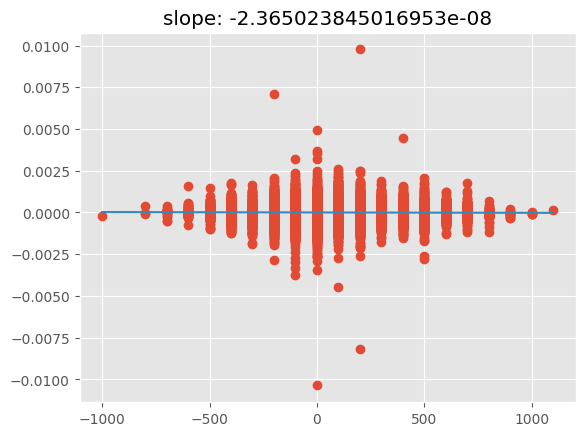

In [32]:
sft = -1
returns = df.Close.pct_change()
plt.plot(all_pats,returns.shift(sft),'o')
m = np.polyfit(all_pats.iloc[sft+1:-1], returns.shift(sft).iloc[sft+1:-1],1)
xx = np.linspace(min(all_pats),max(all_pats),200)
yy=np.polyval(m,xx)
plt.plot(xx,yy)
plt.title('slope: %s'%m[0])

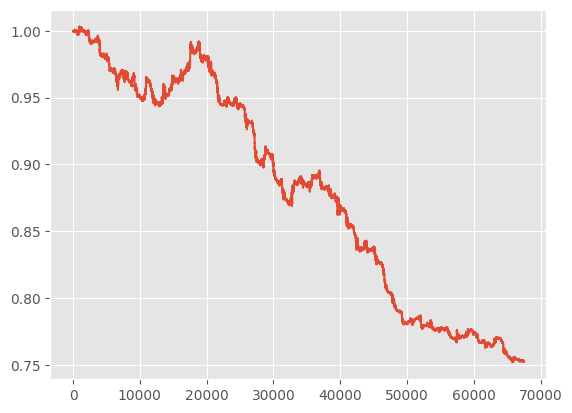

In [34]:
plt.plot((1+(np.sign(all_pats.iloc[sft+1:-1])*returns.shift(sft).iloc[sft+1:-1])).cumprod())

In [83]:
oos = 14000
model = LinearRegression()
model.fit(patterns.iloc[sft+1:-oos],returns.shift(sft).iloc[sft+1:-oos])

LinearRegression()

In [84]:
pred = model.predict(patterns.iloc[-oos:])

In [85]:
real = returns.shift(sft).iloc[-oos:]

(-0.01, 0.01)

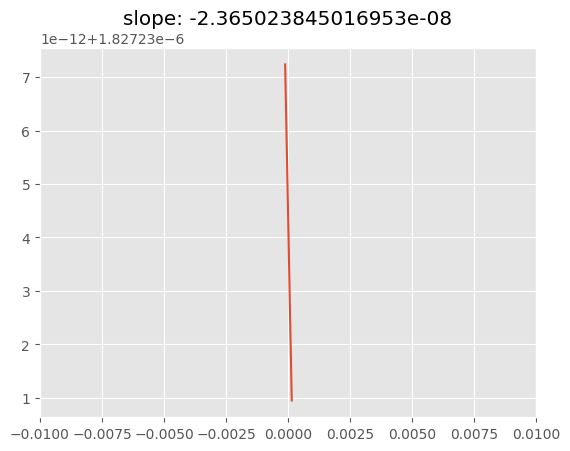

In [86]:
xx= np.linspace(min(pred),max(pred),200)
yy = np.polyval(m,xx)
plt.plot(xx,yy)
plt.title('slope: %s'%m[0])
plt.xlim([-0.01,0.01])

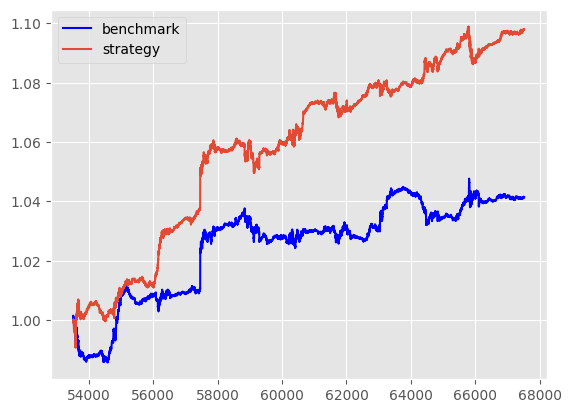

In [87]:
bm = (1+df.Close.iloc[-oos:].pct_change()).cumprod()
strat = (1+real*np.sign(pred)).cumprod()

plt.plot(bm, 'b-', label = 'benchmark')
strat.plot(label='strategy');
plt.legend()

In [94]:
oos = 14000
model = LogisticRegression(max_iter=5000, tol=0.01)
model.fit(patterns.iloc[sft+1:-oos],np.sign(returns.shift(sft).iloc[sft+1:-oos]))

LogisticRegression(max_iter=5000, tol=0.01)

In [95]:
pred = model.predict(patterns.iloc[-oos:])

In [96]:
real = returns.shift(sft).iloc[-oos:]

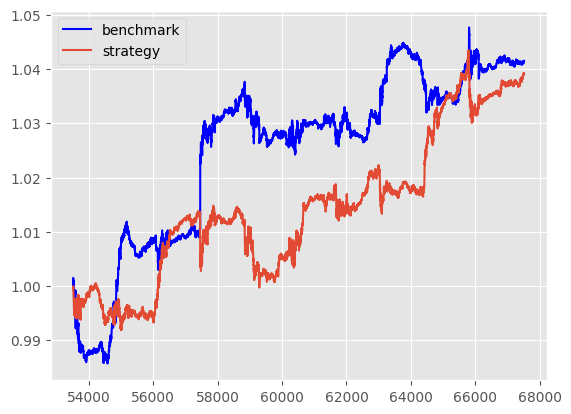

In [97]:
bm = (1+df.Close.iloc[-oos:].pct_change()).cumprod()
strat = (1+real*np.sign(pred)).cumprod()

plt.plot(bm, 'b-', label = 'benchmark')
strat.plot(label = 'strategy');
plt.legend()

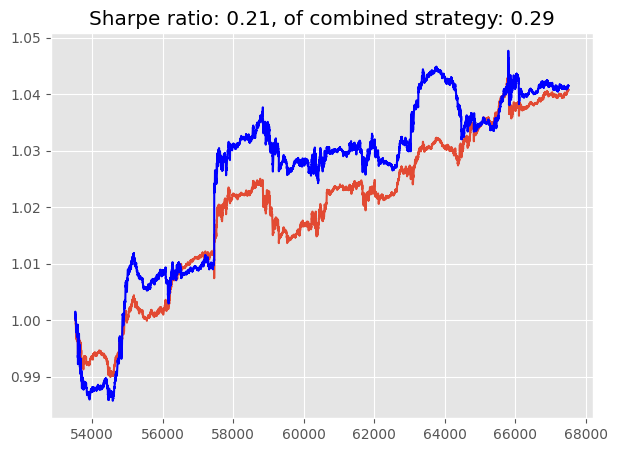

In [98]:
r_strat = real*np.sign(pred)
r_comb = (df.Close.iloc[-oos:].pct_change()+real*np.sign(pred))/2
r_bm = df.Close.iloc[-oos:].pct_change()
S_comb = np.mean(r_comb)/np.std(r_comb)*16
S_bm = np.mean(r_bm)/np.std(r_strat)*16
S_strat = np.mean(r_strat)/np.std(r_strat)*16

plt.figure(figsize=[7,5])
plt.title('Sharpe ratio: %.2f, of combined strategy: %.2f'%(S_bm, S_comb))
(1+r_comb).cumprod().plot()
plt.plot(bm,'b-', label='benchmark')

In [99]:
# Assuming 'patterns' has a timestamp index
timestamps = patterns.iloc[-oos:].index  # Adjust this if timestamps are stored differently

# Create a DataFrame with timestamps and predictions
trade_info = pd.DataFrame({
    'Timestamp': timestamps,
    'Prediction': pred
})

# Save the DataFrame to a CSV file
trade_info.to_csv( r'C:\trade_predictions.csv', index=False)